In [1]:
import AR_for_CT as ar
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from Framework import generic_framework
from forward_models import ct
from data_pips import LUNA
from data_pips import ellipses

El = ellipses()
Lu = LUNA()
model = ct((128,128))
network = None

test_LUNA = generic_framework(model=model, data_pip=Lu, network=None)
test_ellipses = generic_framework(model=model, data_pip=El, network=None)

C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Training Data found: 397
Evaluation Data found: 278


(1, 128, 128, 1)
(1, 30, 183, 1)
0.0
0.999945
-0.0827045
1.33325


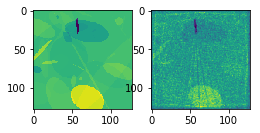

In [37]:
y, x_true, fbp = test_ellipses.generate_training_data(1)
print(np.shape(x_true))
print(np.shape(y))
print(np.amin(x_true))
print(np.amax(x_true))
print(np.amin(fbp))
print(np.amax(fbp))
plt.figure()
plt.subplot(131)
plt.imshow(x_true[0,...,0])
plt.subplot(132)
plt.imshow(fbp[0,...,0])
plt.show()

In [2]:
from Framework import adversarial_regulariser
test_Ar = adversarial_regulariser()

Training Data found: 397
Evaluation Data found: 278


No save found


(16, 128, 128, 1)
-0.238926
0.761074
-3.72529e-09
33.6428


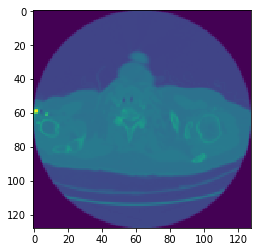

In [5]:
y, x_true, fbp = data.generate_data(16)
pic = x_true
i = 1
print(pic.shape)
print(np.amin(pic[i,...]))
print(np.amax(pic[i,...]))
print(np.average(pic[i,...]))
dif = x_true[i,...,0] - fbp[i,...,0]
print(np.sum(np.square(dif)))
plt.imshow(pic[i,...,0])
plt.show()

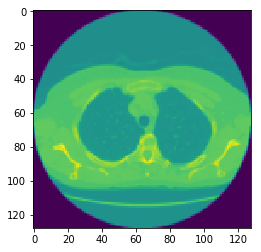

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [13]:
list = pp.find('*.dcm', './Train_Data')
print(len(list))

397


In [15]:
import platform
platform.node()

'LAPTOP-E6AJ1CPF'

In [6]:
import numpy as np
true, cor = denoiser.generate_local_input(128)
recon = np.copy(cor)

78.3352261281


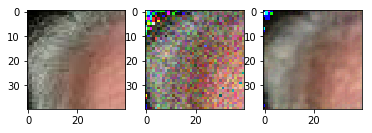

In [ ]:
stepsize = 0.2
steps = 0
print(str(np.linalg.norm(cor - true)))
for k in range(steps):
    gradient = denoiser.sess.run([denoiser.pic_grad], feed_dict={denoiser.inpainted_im: recon,
                                                                     denoiser.corrupted_im: cor})
    recon = recon - stepsize * gradient[0][0]
    # evaluate L2 distance
    print(str(np.linalg.norm(recon - true)))
plt.subplot(131)
plt.imshow(true[0,...])
plt.subplot(132)
plt.imshow(cor[0,...])
plt.subplot(133)
plt.imshow(recon[0,...])
plt.savefig('Saves/Pictures/' + denoiser.model_name + '/example.png')